### Object Detection

In [0]:
%load_ext autoreload
%autoreload 2
import torchvision
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:03<00:00, 52.9MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
       

In [0]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [0]:
def get_prediction(img_path, threshold):
  img = Image.open(img_path) # Load the image
  transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()]) # Defing PyTorch Transform
  img = transform(img) # Apply the transform to the image
  pred = model([img]) # Pass the image to the model
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # Get the Prediction Score
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding boxes
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class

In [0]:
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
 
  boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
  img = cv2.imread(img_path) # Read image with cv2
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
    cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
  plt.figure(figsize=(20,30)) # display the output image
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

--2019-10-29 20:38:09--  https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg
Resolving www.wsha.org (www.wsha.org)... 104.198.7.33
Connecting to www.wsha.org (www.wsha.org)|104.198.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1923610 (1.8M) [image/jpeg]
Saving to: ‘people.jpg’

people.jpg          100%[===================>]   1.83M  6.05MB/s    in 0.3s    

2019-10-29 20:38:10 (6.05 MB/s) - ‘people.jpg’ saved [1923610/1923610]



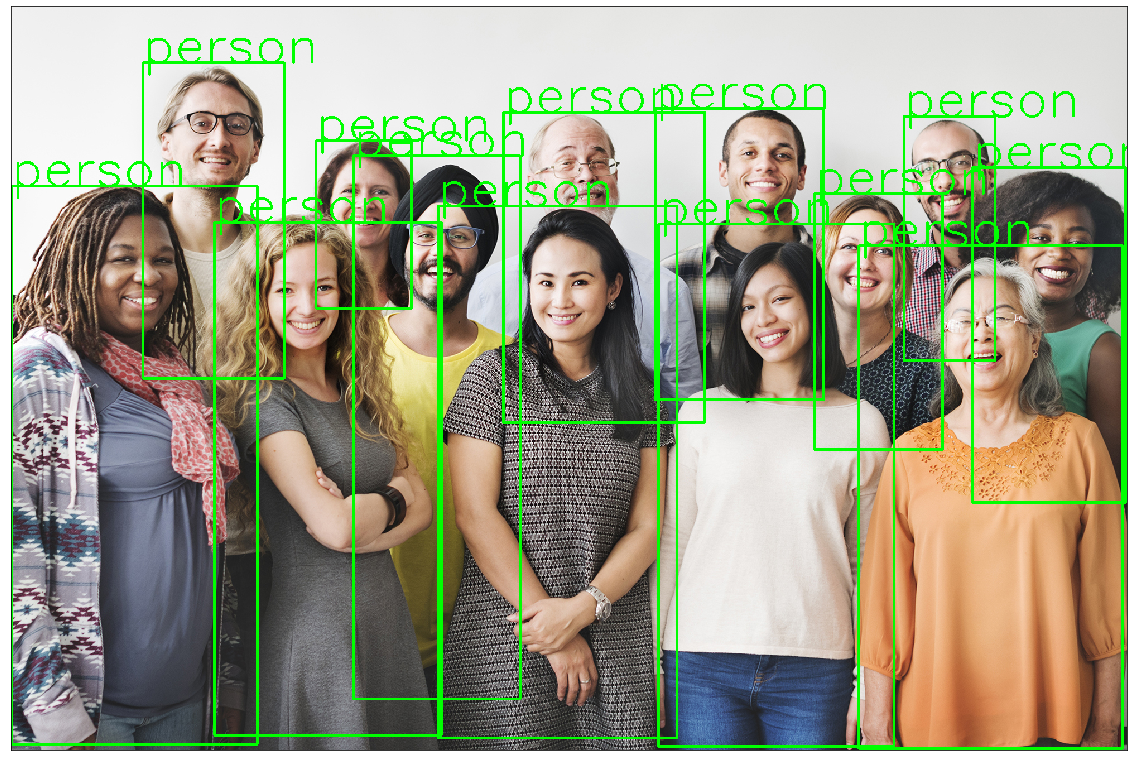

In [6]:
!wget https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg -O people.jpg
object_detection_api('./people.jpg', threshold=0.8)

--2019-10-29 20:38:23--  https://images.unsplash.com/photo-1458169495136-854e4c39548a
Resolving images.unsplash.com (images.unsplash.com)... 151.101.186.208, 2a04:4e42:2c::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.186.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1168686 (1.1M) [image/jpeg]
Saving to: ‘girl_cars.jpg’

girl_cars.jpg       100%[===================>]   1.11M  --.-KB/s    in 0.06s   

2019-10-29 20:38:24 (18.2 MB/s) - ‘girl_cars.jpg’ saved [1168686/1168686]



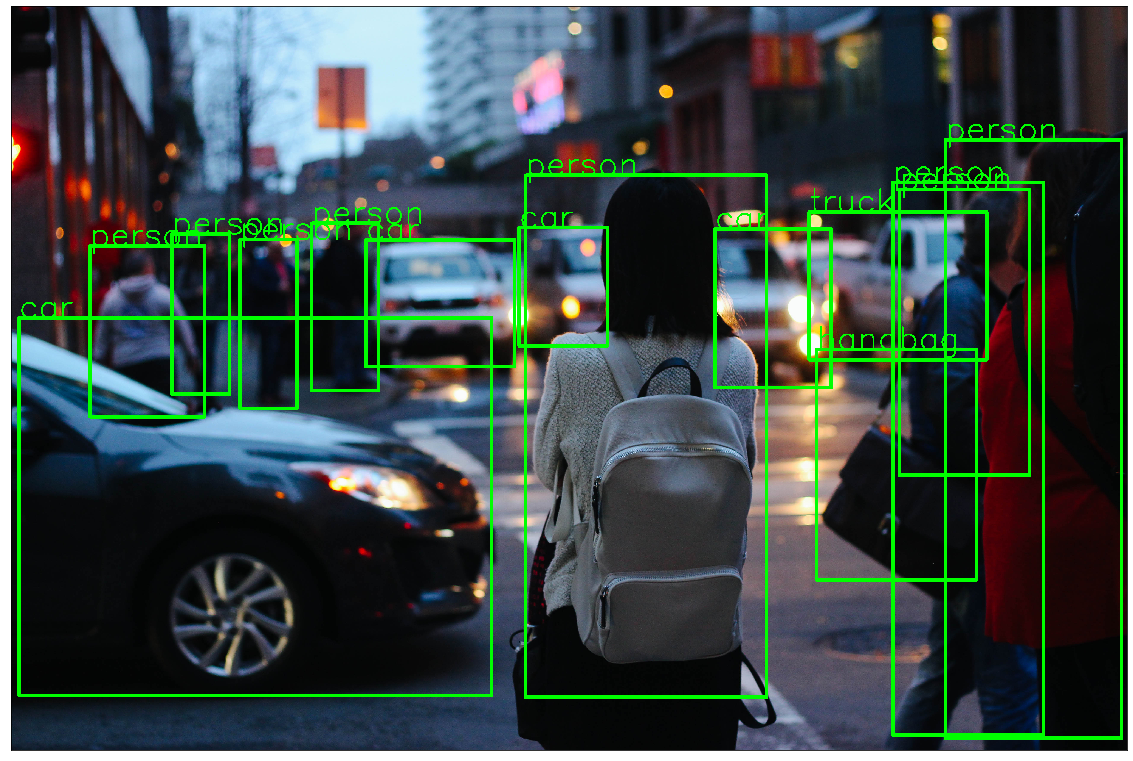

In [7]:
!wget https://images.unsplash.com/photo-1458169495136-854e4c39548a -O girl_cars.jpg
object_detection_api('./girl_cars.jpg', rect_th=15, text_th=7, text_size=5, threshold=0.8)

### Spacy

In [8]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [0]:
# Copyright 2017 Peter de Vocht
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
import en_core_web_sm

# use spacy small model
nlp = en_core_web_sm.load()

# dependency markers for subjects
SUBJECTS = {"nsubj", "nsubjpass", "csubj", "csubjpass", "agent", "expl"}
# dependency markers for objects
OBJECTS = {"dobj", "dative", "attr", "oprd"}
# POS tags that will break adjoining items
BREAKER_POS = {"CCONJ", "VERB"}
# words that are negations
NEGATIONS = {"no", "not", "n't", "never", "none"}


# does dependency set contain any coordinating conjunctions?
def contains_conj(depSet):
    return "and" in depSet or "or" in depSet or "nor" in depSet or \
           "but" in depSet or "yet" in depSet or "so" in depSet or "for" in depSet


# get subs joined by conjunctions
def _get_subs_from_conjunctions(subs):
    more_subs = []
    for sub in subs:
        # rights is a generator
        rights = list(sub.rights)
        rightDeps = {tok.lower_ for tok in rights}
        if contains_conj(rightDeps):
            more_subs.extend([tok for tok in rights if tok.dep_ in SUBJECTS or tok.pos_ == "NOUN"])
            if len(more_subs) > 0:
                more_subs.extend(_get_subs_from_conjunctions(more_subs))
    return more_subs


# get objects joined by conjunctions
def _get_objs_from_conjunctions(objs):
    more_objs = []
    for obj in objs:
        # rights is a generator
        rights = list(obj.rights)
        rightDeps = {tok.lower_ for tok in rights}
        if contains_conj(rightDeps):
            more_objs.extend([tok for tok in rights if tok.dep_ in OBJECTS or tok.pos_ == "NOUN"])
            if len(more_objs) > 0:
                more_objs.extend(_get_objs_from_conjunctions(more_objs))
    return more_objs


# find sub dependencies
def _find_subs(tok):
    head = tok.head
    while head.pos_ != "VERB" and head.pos_ != "NOUN" and head.head != head:
        head = head.head
    if head.pos_ == "VERB":
        subs = [tok for tok in head.lefts if tok.dep_ == "SUB"]
        if len(subs) > 0:
            verb_negated = _is_negated(head)
            subs.extend(_get_subs_from_conjunctions(subs))
            return subs, verb_negated
        elif head.head != head:
            return _find_subs(head)
    elif head.pos_ == "NOUN":
        return [head], _is_negated(tok)
    return [], False


# is the tok set's left or right negated?
def _is_negated(tok):
    parts = list(tok.lefts) + list(tok.rights)
    for dep in parts:
        if dep.lower_ in NEGATIONS:
            return True
    return False


# get all the verbs on tokens with negation marker
def _find_svs(tokens):
    svs = []
    verbs = [tok for tok in tokens if tok.pos_ == "VERB"]
    for v in verbs:
        subs, verbNegated = _get_all_subs(v)
        if len(subs) > 0:
            for sub in subs:
                svs.append((sub.orth_, "!" + v.orth_ if verbNegated else v.orth_))
    return svs


# get grammatical objects for a given set of dependencies (including passive sentences)
def _get_objs_from_prepositions(deps, is_pas):
    objs = []
    for dep in deps:
        if dep.pos_ == "ADP" and (dep.dep_ == "prep" or (is_pas and dep.dep_ == "agent")):
            objs.extend([tok for tok in dep.rights if tok.dep_  in OBJECTS or
                         (tok.pos_ == "PRON" and tok.lower_ == "me") or
                         (is_pas and tok.dep_ == 'pobj')])
    return objs


# get objects from the dependencies using the attribute dependency
def _get_objs_from_attrs(deps, is_pas):
    for dep in deps:
        if dep.pos_ == "NOUN" and dep.dep_ == "attr":
            verbs = [tok for tok in dep.rights if tok.pos_ == "VERB"]
            if len(verbs) > 0:
                for v in verbs:
                    rights = list(v.rights)
                    objs = [tok for tok in rights if tok.dep_ in OBJECTS]
                    objs.extend(_get_objs_from_prepositions(rights, is_pas))
                    if len(objs) > 0:
                        return v, objs
    return None, None


# xcomp; open complement - verb has no suject
def _get_obj_from_xcomp(deps, is_pas):
    for dep in deps:
        if dep.pos_ == "VERB" and dep.dep_ == "xcomp":
            v = dep
            rights = list(v.rights)
            objs = [tok for tok in rights if tok.dep_ in OBJECTS]
            objs.extend(_get_objs_from_prepositions(rights, is_pas))
            if len(objs) > 0:
                return v, objs
    return None, None


# get all functional subjects adjacent to the verb passed in
def _get_all_subs(v):
    verb_negated = _is_negated(v)
    subs = [tok for tok in v.lefts if tok.dep_ in SUBJECTS and tok.pos_ != "DET"]
    if len(subs) > 0:
        subs.extend(_get_subs_from_conjunctions(subs))
    else:
        foundSubs, verb_negated = _find_subs(v)
        subs.extend(foundSubs)
    return subs, verb_negated


# is the token a verb?  (excluding auxiliary verbs)
def _is_non_aux_verb(tok):
    return tok.pos_ == "VERB" and (tok.dep_ != "aux" and tok.dep_ != "auxpass")


# return the verb to the right of this verb in a CCONJ relationship if applicable
# returns a tuple, first part True|False and second part the modified verb if True
def _right_of_verb_is_conj_verb(v):
    # rights is a generator
    rights = list(v.rights)

    # VERB CCONJ VERB (e.g. he beat and hurt me)
    if len(rights) > 1 and rights[0].pos_ == 'CCONJ':
        for tok in rights[1:]:
            if _is_non_aux_verb(tok):
                return True, tok

    return False, v


# get all objects for an active/passive sentence
def _get_all_objs(v, is_pas):
    # rights is a generator
    rights = list(v.rights)

    objs = [tok for tok in rights if tok.dep_ in OBJECTS or (is_pas and tok.dep_ == 'pobj')]
    objs.extend(_get_objs_from_prepositions(rights, is_pas))

    #potentialNewVerb, potentialNewObjs = _get_objs_from_attrs(rights)
    #if potentialNewVerb is not None and potentialNewObjs is not None and len(potentialNewObjs) > 0:
    #    objs.extend(potentialNewObjs)
    #    v = potentialNewVerb

    potential_new_verb, potential_new_objs = _get_obj_from_xcomp(rights, is_pas)
    if potential_new_verb is not None and potential_new_objs is not None and len(potential_new_objs) > 0:
        objs.extend(potential_new_objs)
        v = potential_new_verb
    if len(objs) > 0:
        objs.extend(_get_objs_from_conjunctions(objs))
    return v, objs


# return true if the sentence is passive - at he moment a sentence is assumed passive if it has an auxpass verb
def _is_passive(tokens):
    for tok in tokens:
        if tok.dep_ == "auxpass":
            return True
    return False


# resolve a 'that' where/if appropriate
def _get_that_resolution(toks):
    for tok in toks:
        if 'that' in [t.orth_ for t in tok.lefts]:
            return tok.head
    return toks


# simple stemmer using lemmas
def _get_lemma(word: str):
    tokens = nlp(word)
    if len(tokens) == 1:
        return tokens[0].lemma_
    return word


# print information for displaying all kinds of things of the parse tree
def printDeps(toks):
    for tok in toks:
        print(tok.orth_, tok.dep_, tok.pos_, tok.head.orth_, [t.orth_ for t in tok.lefts], [t.orth_ for t in tok.rights])


# expand an obj / subj np using its chunk
def expand(item, tokens, visited):
    if item.lower_ == 'that':
        item = _get_that_resolution(tokens)

    parts = []

    if hasattr(item, 'lefts'):
        for part in item.lefts:
            if part.pos_ in BREAKER_POS:
                break
            if not part.lower_ in NEGATIONS:
                parts.append(part)

    parts.append(item)

    if hasattr(item, 'rights'):
        for part in item.rights:
            if part.pos_ in BREAKER_POS:
                break
            if not part.lower_ in NEGATIONS:
                parts.append(part)

    if hasattr(parts[-1], 'rights'):
        for item2 in parts[-1].rights:
            if item2.pos_ == "DET" or item2.pos_ == "NOUN":
                if item2.i not in visited:
                    visited.add(item2.i)
                    parts.extend(expand(item2, tokens, visited))
            break

    return parts


# convert a list of tokens to a string
def to_str(tokens):
    return ' '.join([item.text for item in tokens])


# find verbs and their subjects / objects to create SVOs, detect passive/active sentences
def findSVOs(tokens):
    svos = []
    is_pas = _is_passive(tokens)
    verbs = [tok for tok in tokens if _is_non_aux_verb(tok)]
    visited = set()  # recursion detection
    for v in verbs:
        subs, verbNegated = _get_all_subs(v)
        # hopefully there are subs, if not, don't examine this verb any longer
        if len(subs) > 0:
            isConjVerb, conjV = _right_of_verb_is_conj_verb(v)
            if isConjVerb:
                v2, objs = _get_all_objs(conjV, is_pas)
                for sub in subs:
                    for obj in objs:
                        objNegated = _is_negated(obj)
                        if is_pas:  # reverse object / subject for passive
                            svos.append((to_str(expand(obj, tokens, visited)),
                                         "!" + v.lemma_ if verbNegated or objNegated else v.lemma_, to_str(expand(sub, tokens, visited))))
                            svos.append((to_str(expand(obj, tokens, visited)),
                                         "!" + v2.lemma_ if verbNegated or objNegated else v2.lemma_, to_str(expand(sub, tokens, visited))))
                        else:
                            svos.append((to_str(expand(sub, tokens, visited)),
                                         "!" + v.lower_ if verbNegated or objNegated else v.lower_, to_str(expand(obj, tokens, visited))))
                            svos.append((to_str(expand(sub, tokens, visited)),
                                         "!" + v2.lower_ if verbNegated or objNegated else v2.lower_, to_str(expand(obj, tokens, visited))))
            else:
                v, objs = _get_all_objs(v, is_pas)
                for sub in subs:
                    for obj in objs:
                        objNegated = _is_negated(obj)
                        if is_pas:  # reverse object / subject for passive
                            svos.append((to_str(expand(obj, tokens, visited)),
                                         "!" + v.lemma_ if verbNegated or objNegated else v.lemma_, to_str(expand(sub, tokens, visited))))
                        else:
                            svos.append((to_str(expand(sub, tokens, visited)),
                                         "!" + v.lower_ if verbNegated or objNegated else v.lower_, to_str(expand(obj, tokens, visited))))
    return svos

In [10]:
import spacy
# from subject_verb_object_extract import findSVOs, nlp

tokens = nlp("she is eating pizza")
# tokens = nlp("the pizza is being eaten by her")
svos = findSVOs(tokens)
print(svos)

[('she', 'eating', 'pizza')]


### NLTK

In [11]:
from nltk.parse.stanford import StanfordParser
from nltk.tree import ParentedTree, Tree
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [21]:
import nltk
nltk.download('conll2000')
nltk.download('brown')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')

[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [0]:
from nltk import DefaultTagger, UnigramTagger, BigramTagger, TrigramTagger

class SubjectTrigramTagger(object):

    """ Creates an instance of NLTKs TrigramTagger with a backoff
    tagger of a bigram tagger a unigram tagger and a default tagger that sets
    all words to nouns (NN)
    """

    def __init__(self, train_sents):

        """
        train_sents: trained sentences which have already been tagged.
                Currently using Brown, conll2000, and TreeBank corpuses
        """

        t0 = DefaultTagger('NN')
        t1 = UnigramTagger(train_sents, backoff=t0)
        t2 = BigramTagger(train_sents, backoff=t1)
        self.tagger = TrigramTagger(train_sents, backoff=t2)

    def tag(self, tokens):
        return self.tagger.tag(tokens)

In [0]:
# from trigram_tagger import SubjectTrigramTagger
from bs4 import BeautifulSoup
import requests
import re
import pickle
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Noun Part of Speech Tags used by NLTK
# More can be found here
# http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/
NOUNS = ['NN', 'NNS', 'NNP', 'NNPS']
VERBS = ['VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']

def download_document(url):
    """Downloads document using BeautifulSoup, extracts the subject and all
    text stored in paragraph tags
    """
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    title = soup.find('title').get_text()
    document = ' '.join([p.get_text() for p in soup.find_all('p')])
    return document

def clean_document(document):
    """Remove enronious characters. Extra whitespace and stop words"""
    document = re.sub('[^A-Za-z .-]+', ' ', document)
    document = ' '.join(document.split())
    document = ' '.join([i for i in document.split() if i not in stop])
    return document

def tokenize_sentences(document):
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    return sentences

def get_entities(document):
    """Returns Named Entities using NLTK Chunking"""
    entities = []
    sentences = tokenize_sentences(document)

    # Part of Speech Tagging
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    for tagged_sentence in sentences:
        for chunk in nltk.ne_chunk(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                entities.append(' '.join([c[0] for c in chunk]).lower())
    return entities

def word_freq_dist(document):
    """Returns a word count frequency distribution"""
    words = nltk.tokenize.word_tokenize(document)
    words = [word.lower() for word in words if word not in stop]
    fdist = nltk.FreqDist(words)
    return fdist

def extract_subject(document):
    # Get most frequent Nouns
    fdist = word_freq_dist(document)
    most_freq_nouns = [w for w, c in fdist.most_common(10)
                       if nltk.pos_tag([w])[0][1] in NOUNS]

    # Get Top 10 entities
    entities = get_entities(document)
    top_10_entities = [w for w, c in nltk.FreqDist(entities).most_common(10)]

    # Get the subject noun by looking at the intersection of top 10 entities
    # and most frequent nouns. It takes the first element in the list
    subject_nouns = [entity for entity in top_10_entities
                    if entity.split()[0] in most_freq_nouns]
    print(subject_nouns)
    return subject_nouns[0]

def trained_tagger(existing=False):
    """Returns a trained trigram tagger
    existing : set to True if already trained tagger has been pickled
    """
    if existing:
        trigram_tagger = pickle.load(open('trained_tagger.pkl', 'rb'))
        return trigram_tagger

    # Aggregate trained sentences for N-Gram Taggers
    train_sents = nltk.corpus.brown.tagged_sents()
    train_sents += nltk.corpus.conll2000.tagged_sents()
    train_sents += nltk.corpus.treebank.tagged_sents()

    # Create instance of SubjectTrigramTagger and persist instance of it
    trigram_tagger = SubjectTrigramTagger(train_sents)
    pickle.dump(trigram_tagger, open('trained_tagger.pkl', 'wb'))

    return trigram_tagger

def tag_sentences(subject, document):
    """Returns tagged sentences using POS tagging"""
    trigram_tagger = trained_tagger(existing=False)

    # Tokenize Sentences and words
    sentences = tokenize_sentences(document)
    merge_multi_word_subject(sentences, subject)

    # Filter out sentences where subject is not present
    sentences = [sentence for sentence in sentences if subject in
                [word.lower() for word in sentence]]

    # Tag each sentence
    tagged_sents = [trigram_tagger.tag(sent) for sent in sentences]
    return tagged_sents

def merge_multi_word_subject(sentences, subject):
    """Merges multi word subjects into one single token
    ex. [('steve', 'NN', ('jobs', 'NN')] -> [('steve jobs', 'NN')]
    """
    if len(subject.split()) == 1:
        return sentences
    subject_lst = subject.split()
    sentences_lower = [[word.lower() for word in sentence]
                        for sentence in sentences]
    for i, sent in enumerate(sentences_lower):
        if subject_lst[0] in sent:
            for j, token in enumerate(sent):
                start = subject_lst[0] == token
                exists = subject_lst == sent[j:j+len(subject_lst)]
                if start and exists:
                    del sentences[i][j+1:j+len(subject_lst)]
                    sentences[i][j] = subject
    return sentences

def get_svo(sentence, subject):
    """Returns a dictionary containing:
    subject : the subject determined earlier
    action : the action verb of particular related to the subject
    object : the object the action is referring to
    phrase : list of token, tag pairs for that lie within the indexes of
                the variables above
    """
    subject_idx = next((i for i, v in enumerate(sentence)
                    if v[0].lower() == subject), None)
    data = {'subject': subject}
    for i in range(subject_idx, len(sentence)):
        found_action = False
        for j, (token, tag) in enumerate(sentence[i+1:]):
            if tag in VERBS:
                data['action'] = token
                found_action = True
            if tag in NOUNS and found_action == True:
                data['object'] = token
                data['phrase'] = sentence[i: i+j+2]
                return data
    return {}

# if __name__ == '__main__':
# url = 'http://www.nytimes.com/2016/06/13/us/politics/bernie-sanders-campaign.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news'
# document = download_document(url)
# # document = pickle.load(open('document.pkl', 'rb'))
# print(document)
# document = clean_document(document)
# subject = extract_subject(document)
# print(subject)

# tagged_sents = tag_sentences(subject, document)

# svos = [get_svo(sentence, subject)
#                     for sentence in tagged_sents]
# for svo in svos:
#     if svo:
#         print(svo)

In [33]:
document = "he is eating pizza"
# document = clean_document(document)
print(document)
subject = extract_subject(document)
print(subject)

tagged_sents = tag_sentences(subject, document)

svos = [get_svo(sentence, subject) for sentence in tagged_sents]

for svo in svos:
    if svo:
        print(svo)

he is eating pizza
[]


IndexError: ignored

### Stanford NLP

In [34]:
!wget https://nlp.stanford.edu/software/stanford-parser-full-2018-10-17.zip

--2019-10-29 20:46:43--  https://nlp.stanford.edu/software/stanford-parser-full-2018-10-17.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 641564462 (612M) [application/zip]
Saving to: ‘stanford-parser-full-2018-10-17.zip’

stanford-parser-ful 100%[===================>] 611.84M  42.6MB/s    in 13s     

2019-10-29 20:46:56 (48.8 MB/s) - ‘stanford-parser-full-2018-10-17.zip’ saved [641564462/641564462]



In [ ]:
!unzip stanford-parser-full-2018-10-17.zip

In [0]:
import os
# /content/stanford-parser-full-2018-10-17
os.environ['STANFORD_PARSER'] = "stanford-parser-full-2018-10-17/stanford-parser.jar"
os.environ['STANFORD_MODELS'] = "stanford-parser-full-2018-10-17/stanford-parser-3.9.2-models.jar"

In [37]:
from nltk.parse.stanford import StanfordParser
from nltk.tree import ParentedTree, Tree
 
parser = StanfordParser()
 
# Parse the example sentence
sent = 'A rare black squirrel has become a regular visitor to a suburban garden'
t = list(parser.raw_parse(sent))[0]
t = ParentedTree.convert(t)
 
t.pretty_print()

                 ROOT                                                             
                  |                                                                
                  S                                                               
      ____________|_________________                                               
     |                              VP                                            
     |                    __________|_____________                                 
     |                   |                        VP                              
     |                   |     ___________________|_____________                   
     |                   |    |           |                     PP                
     |                   |    |           |              _______|_____             
     NP                  |    |           NP            |             NP          
  ___|____________       |    |      _____|_______      |    _________|_______    

In [0]:
# Breadth First Search the tree and take the first noun in the NP subtree.
def find_subject(t):
  for s in t.subtrees(lambda t: t.label() == 'NP'):
    for n in s.subtrees(lambda n: n.label().startswith('NN')):
      return (n[0], find_attrs(n))
 
# Depth First Search the tree and take the last verb in VP subtree.
def find_predicate(t):
  v = None
 
  for s in t.subtrees(lambda t: t.label() == 'VP'):
    for n in s.subtrees(lambda n: n.label().startswith('VB')):
      v = n
  return (v[0], find_attrs(v))
 
# Breadth First Search the siblings of VP subtree
# and take the first noun or adjective
def find_object(t):
  for s in t.subtrees(lambda t: t.label() == 'VP'):
    for n in s.subtrees(lambda n: n.label() in ['NP', 'PP', 'ADJP']):
      if n.label() in ['NP', 'PP']:
        for c in n.subtrees(lambda c: c.label().startswith('NN')):
          return (c[0], find_attrs(c))
      else:
        for c in n.subtrees(lambda c: c.label().startswith('JJ')):
          return (c[0], find_attrs(c))
 
def find_attrs(node):
  attrs = []
  p = node.parent()
 
  # Search siblings of adjective for adverbs
  if node.label().startswith('JJ'):
    for s in p:
      if s.label() == 'RB':
        attrs.append(s[0])
 
  elif node.label().startswith('NN'):
    for s in p:
      if s.label() in ['DT','PRP$','POS','JJ','CD','ADJP','QP','NP']:
        attrs.append(s[0])
 
  # Search siblings of verbs for adverb phrase
  elif node.label().startswith('VB'):
    for s in p:
      if s.label() == 'ADVP':
        attrs.append(' '.join(s.flatten()))
 
  # Search uncles
  # if the node is noun or adjective search for prepositional phrase
  if node.label().startswith('JJ') or node.label().startswith('NN'):
      for s in p.parent():
        if s != p and s.label() == 'PP':
          attrs.append(' '.join(s.flatten()))
 
  elif node.label().startswith('VB'):
    for s in p.parent():
      if s != p and s.label().startswith('VB'):
        attrs.append(' '.join(s.flatten()))
 
  return attrs

In [39]:
print(find_subject(t))
print(find_predicate(t))
print(find_object(t))

('squirrel', ['A', 'rare', 'black'])
('become', ['has'])
('visitor', ['a', 'regular', 'to a suburban garden'])


In [40]:
def f1(sent):
  # sent = 'A rare black squirrel has become a regular visitor to a suburban garden'
  t = list(parser.raw_parse(sent))[0]
  t = ParentedTree.convert(t)
  
  t.pretty_print()
  print(find_subject(t))
  print(find_predicate(t))
  print(find_object(t))

sent = "find the lamp on the table"
f1(sent)

             ROOT                  
              |                     
              S                    
              |                     
              VP                   
  ____________|________             
 |        |            PP          
 |        |         ___|___         
 |        NP       |       NP      
 |     ___|___     |    ___|____    
 VB   DT      NN   IN  DT       NN 
 |    |       |    |   |        |   
find the     lamp  on the     table

('lamp', ['the', 'on the table'])
('find', [])
('lamp', ['the', 'on the table'])


### All Pairs Detection

In [0]:
import numpy as np
def object_detection_api(img_path, sub, obj, threshold=0.5, rect_th=3, text_size=3, text_th=3):
 
  boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
  img = cv2.imread(img_path) # Read image with cv2
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  
  sub_list=[]
  obj_list=[]

  for i in range(len(boxes)):
    if(pred_cls[i]==sub):
      sub_list.append(i)
    if(pred_cls[i]==obj):
      obj_list.append(i)

  for i1 in range(len(sub_list)):
    for j1 in range(len(obj_list)):
      if(sub_list[i1]==obj_list[j1]):
        continue
      plt.clf()
      img1 = np.array(img)
      i = sub_list[i1]
      cv2.rectangle(img1, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
      cv2.putText(img1,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class

      i = obj_list[j1]
      cv2.rectangle(img1, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
      cv2.putText(img1,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
      plt.imshow(img1)
      plt.xticks([])
      plt.yticks([])
      plt.show()

--2019-10-29 20:50:22--  https://images.unsplash.com/photo-1458169495136-854e4c39548a
Resolving images.unsplash.com (images.unsplash.com)... 151.101.186.208, 2a04:4e42:2c::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.186.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1168686 (1.1M) [image/jpeg]
Saving to: ‘girl_cars.jpg’

girl_cars.jpg       100%[===================>]   1.11M  --.-KB/s    in 0.06s   

2019-10-29 20:50:22 (17.9 MB/s) - ‘girl_cars.jpg’ saved [1168686/1168686]



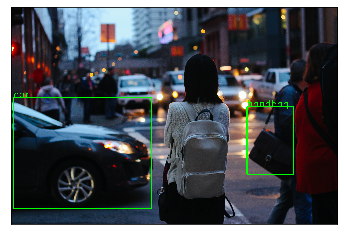

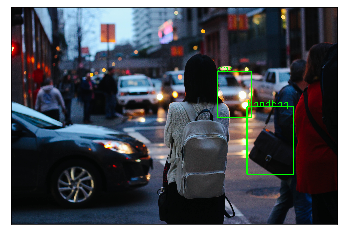

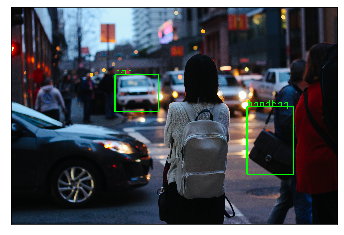

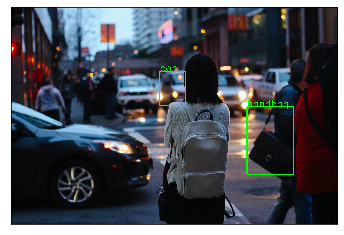

In [42]:
!wget https://images.unsplash.com/photo-1458169495136-854e4c39548a -O girl_cars.jpg
subject = "car"
object = "handbag"
object_detection_api('./girl_cars.jpg', subject, object, rect_th=15, text_th=7, text_size=5, threshold=0.8)

In [0]:
def show_all_pairs(img_path, text):
  tokens = nlp(text)
  # tokens = nlp("the pizza is being eaten by her")
  svos = findSVOs(tokens)
  # print(svos)
  subject=str(tokens[0])
  obj=str(tokens[2])
  print(tokens)
  print(subject)
  print(obj)

  object_detection_api(img_path, subject, obj, rect_th=15, text_th=7, text_size=5, threshold=0.8)


handbag near car
handbag
car


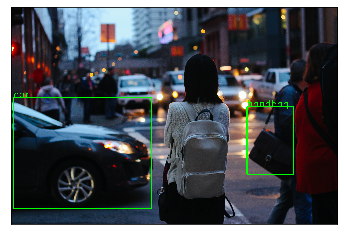

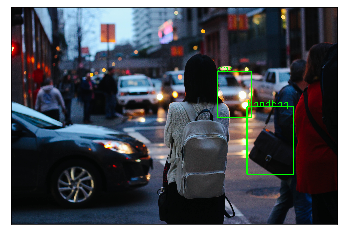

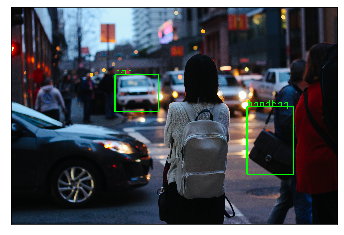

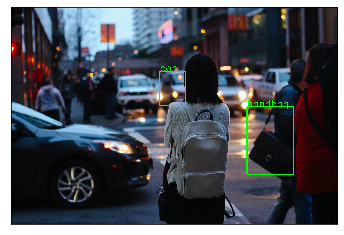

In [44]:
show_all_pairs('./girl_cars.jpg',"handbag near car")

### Please Ignore

In [0]:
!wget http://imagenet.stanford.edu/internal/jcjohns/scene_graphs/sg_dataset.zip

In [ ]:
!unzip sg_dataset.zip